# Summary

- ML models can be divided into 2 classes: discriminative and generative

- discriminative model/conditional model: study conditional probability $P(y|x)$, map the given unobserved variable x to a label y dependent on observed training samples.

    They distinguish decision boundaries through observed data, such as pass/fail, win/lose, alive/dead or healthy/sick.

    e.g., Logistic regression

- generative model: study conditional probability $P(x|y)$, generate data given a label y

    e.g., Naive Bayes classifer, VAE, GAN


- Hamming loss for classification problem is hard to use, use Surrogate loss instead.

# Hamming loss

- in classification problem, learn function $f: \mathcal{X} \mapsto \left\{-1, +1 \right\}$

- if $\mathcal{y} = \left\{-1, +1 \right\}$, 

$$
\begin{align}
\text{Hamming loss} 
&= \mathbb{1}(\hat y \neq y) \text{\ (hard)}\\[1em]
&= \mathbb{1}(\hat y y \leq 0) \text{\ (easier)} \\[1em]
&= \mathbb{1}(sign(\hat y) \neq y) \text{\ (easier)}\\[1em]
&= \left\{\begin{matrix}
1 &  \hat y \neq y\ or\ margin < 0\\
0 &  \hat y = y\ or\ margin > 0\\
\end{matrix}\right.
\end{align}
$$

- if $\mathcal{y} = \left\{0, +1 \right\}$, 

$$
\mathbb{1}(\hat y > 0) = \left\{\begin{matrix}
1 &  \hat y>0\\
0 &  \hat y<0\\
\end{matrix}\right.
$$

- directly optimize Hamming loss (0/1 loss) is NP hard

    coz no matter how wrong $\hat y$ is (margin is very negative), loss  = 1

- also don't have nice property

- so we optimize surrogate losses instead (surrogate means alternative)

# surrogate losses

classification problem, learn function $f: \mathcal{X} \mapsto \mathbb{R}$

| Loss Function    | Mathematical Expression        |
|------------------|--------------------------------|
| Hamming Loss     | $1(y'\neq y) =\mathbb{1}[f(x)y\leq 0]=\mathbb{1}[y\leq \text{sign}(f(x))]$<br>$= \begin{cases} 1 & \text{if } y' \neq y \text{ or } f(x)y < 0 \\ 0 & \text{if } y' = y \text{ or } f(x)y > 0 \end{cases}$ |
| Squared Loss     | $[y - f(x)]^2 = y^2[1 - f(x)y]^2 = [1 - f(x)y]^2$ |
| Logistic Loss    | $\log[1 + e^{-2f(x)y}]$         |
| Hinge Loss       | $[1 - f(x)y]_+ = \begin{cases} 1 - f(x)y & \text{if } f(x)y < 1 \\ 0 & \text{if } f(x)y > 1 \end{cases}$ |
| Boosting Loss    | $e^{-f(x)y}$                    |


- $+$ is positive part of a number

- $sign$ is sign of a number, either -1, 0, +1

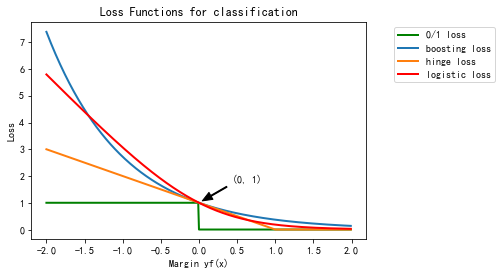

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# s is margin
s=np.arange(-2,2,0.01)

fig, ax = plt.subplots()

# 0/1 loss function
ax.plot(s,(s<0)*1.,linewidth=2,color='green',label='0/1 loss') 

# boosting loss function e^{-s}
ax.plot(s,np.exp(-s),linewidth=2,label='boosting loss')

# hinge loss function max(1-s,0)
ax.plot(s,np.maximum(1-s,0),linewidth=2,label='hinge loss')

# logistic loss function with scaling: ln(1+e^-2s)/ln2
ax.plot(s,np.log(1+np.exp(-2*s))/np.log(2),linewidth=2,label='logistic loss',color='red')


ax.annotate(text='(0, 1)', xy=(0, 1), xycoords='data',
            xytext=(0.6, 0.3), textcoords='axes fraction',
            va='top', ha='left',
            arrowprops=dict(width=1, headlength=10, headwidth=8, facecolor='black', shrink=0.1))

plt.xlabel("Margin yf(x)")

plt.ylabel("Loss")

plt.title("Loss Functions for classification")

plt.legend(bbox_to_anchor=(1.4, 1))

## margin $f(x)y$

- all surrogate losses are function of $f(x)y$, named **margin**

- if margin is very positive, we are very confident $f(x)$ is correct

- if margin is very negative, we are very confident $f(x)$ is wrong 

## properties

- nice things: Surrogate loss are convex functions that upper-bound 0-1 loss. 

   if minimizes the convex surrogate, also minimizes the $0/1$ loss. 


- if f(x) = {-1, +1}, surrogate losses = Hamming loss


- boosting loss - exponential

   1. when margin very negative, error -> +∞
    
   2. when margin very positive, error -> $e^{-\infty }$ = 0
    

- logistic loss - log

   1. when margin very negative, error is asymptotically linear  $-\frac{2}{log2}f\left ( x \right )y$ 渐近线性
    
   2. when margin very positive, error -> $log(1+e^{-\infty })$ = 0


- hinge loss

   1. when margin < 1, error is linear $1-f(x)y$
    
   2. when margin > 1, error = 0

# binary cross-entropy loss

for binary classification, label $y_i \in \{-1,+1\}$. 

$$
C =- \sum_{i=1}^n \left [y_{i}\ln(p_{i})+(1-y_{i})\ln(1-p_{i}) \right ]
$$

$p_i \in [0, 1]$ is predicted label for ith sample

# cross-entropy loss



for multi-class classification of $k$ classes, label $y_i \in \{0, ..., k-1\}$. 

$$
C =- \sum_{i=1}^n \sum_{j=1}^k \left [y_{i}\ln([p_i]_j)+(1-y_{i})\ln(1-[p_i]_j) \right ]
$$

$[p_i]_j \in [0, 1]$ is jth entry of predicted label for ith sample $p_i \in \mathbb{R}^{k}$

in neural network with output layer of k neurons, $[p_i]_j \in [0, 1]$ is value of jth neuron in output layer.

- cross entropy loss is just sum of binary cross-entropy loss over k classes

- in info theory, cross-entropy measures how “surprised” we are on average when we learn the true value of $y$. 

    low surprise (low loss) if the output is expected, i.e., output = true value

    high surprise (high loss) if output is unexpected

# metrics

Micro-averaging: Collect decisions for all classes, compute contingency table, evaluate.

- Micro-Precision = $\sum$ True Pos / ($\sum$  True Pos + $\sum$ False Pos)

- Micro-Recall = $\sum$ True Pos / ($\sum$ True Pos + $\sum$ False Neg)

- Micro-F1-score = (2 * Micro-Precision * Micro-Recall) / (Micro-Precision + Micro-Recall)

Macro-averaging: Compute performance for each class, then average.

- Macro-Precision =  $\frac{1}{n}\sum_{i=1}^n$ Precision(i)

- Macro-Recall = $\frac{1}{n}\sum_{i=1}^n$ Recall(i)

- Macro-F1-score = $\frac{1}{n}\sum_{i=1}^n$ F1-score(i)


Precision (P): True Pos / (True Pos + False Pos)

Recall (R): True Pos / (True Pos + False Neg)

F-measure: weighted harmonic mean of precision and recall.

   $$
   F=\frac{1}{\alpha 1/P +(1-\alpha)1/R} =\frac{(\beta^2+1)P*R}{\beta^2P+R}
   $$


F1-score (balanced F-measure): F-measure is too conservative, take $\beta=1$, we have:

   $$F1=(2 * P * R) / (P+R)$$

Confusion Matrix

- A matrix that represents the true (column) and predicted classes (row). 

- a perfect classifier will have values only on Diagonal 

Accuracy

- Accuracy =  (True Pos+ True Neg) / total

- **Accuracy is not a good metric for imbalanced datasets**

    In imbalanced datasets, one class has significantly more instances than the other(s). the minority class is often the more important class to predict correctly.

    e.g., a dataset = 95% negative examples + 5% positive examples. 
    
    A classifier that predicts all instances as negative would achieve 95% accuracy, even though it completely fails to identify the positive examples.

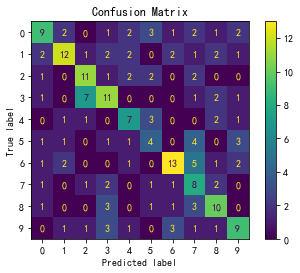

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# Create a random 10-class dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_classes=10, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict the test set
y_pred = clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots()
ConfusionMatrixDisplay(cm).plot(ax=ax)
ax.set_title("Confusion Matrix")
plt.show()


# Binary Classification

Classifiers: Decision trees: Naive based Classifier: Support Vector Machine, Random Forest

ensemble learning: bagging, AdaBoost

In [ ]:
import numpy as np
import pandas as pd  
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut
from sklearn import tree, svm, metrics 
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier 

**20 - Newsgroup dataset**

comprises around 18000 newsgroups posts on 20 topics. Some of the newsgroups are very closely related to each other, while others are highly unrelated.

one training set, one test set: The split is based upon a messages posted before and after a specific date.


Here is a list of some topics:

* alt.atheism, 
* comp.graphics
* comp.sys.ibm.pc.hardware
* comp.sys.mac.hardware
* comp.windows.x

* rec.autos
* rec.motorcycles 
* rec.sport.baseball
* rec.sport.hockey

* sci.crypt 
* sci.electronics
* sci.med
* sci.space

* talk.politics.guns
* talk.politics.mideast
* talk.politics.misc
* talk.religion.misc

* misc.forsale



In [ ]:
# load 1193 docs from training set, each doc belongs to a topic, either 'comp.windows.x' or 'rec.sport.hockey'
news = fetch_20newsgroups(subset='train',
                          categories=('comp.windows.x',
                                      'rec.sport.hockey'),
                          remove=('headers', 'footers', 'quotes'))

# print data size, labels and label names
print(len(news.data), news.target, news.target_names)

# print first doc
news.data[0]

tf_vec = CountVectorizer(max_df=500, 
                      min_df=0,
                      max_features =5000, 
                      ngram_range =(1,2),
                      stop_words='english')

# term-document matrix shape (1193, 5000)
tf_matrix=tf_vec.fit_transform(news.data)

# full matrix is needed for SK-Learn
full_matrix = pd.DataFrame(tf_matrix.todense(),columns=tf_vec.get_feature_names_out())


In [ ]:
full_matrix

,00,00 00,00 april,00 pm,00 utc,000,005,01,0123456789,0123456789 abcdefghijklmnopqrstuvwxyz,...,za,za z0,zalapski,zelepukin,zero,zhamnov,zhitnik,zombo,zone,zubov
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1189,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## training and evaluation using 10-fold CV

In [ ]:
models = {'Decision Tree': tree.DecisionTreeClassifier(), 
          'Naive Bayes': NB(), 
          'SVM': svm.SVC(), 
          'Random Forest': RandomForestClassifier(),
          'Naive Bayes with Bagging': BaggingClassifier(NB(), max_samples = .5, max_features = .5),
          'Naive Bayes with AdaBoost': AdaBoostClassifier(NB(),algorithm = "SAMME", n_estimators = 300)
          }

metrics_fc = {'accuracy': metrics.accuracy_score, 'precision': metrics.precision_score, 'recall': metrics.recall_score, 'F1': metrics.f1_score}

# 10-fold CV 
kf = KFold(n_splits = 10)
# Leave-out-out CV 
loo = LeaveOneOut()
for name, clf in models.items():
    total = {'accuracy': [], 'precision': [], 'recall': [], 'F1': []}

    # for train_id, test_id in loo.split(full_matrix)
    for train_id, test_id in kf.split(full_matrix): 
        xtrain, xtest, ytrain, ytest = full_matrix.iloc[train_id], full_matrix.iloc[test_id], news.target[train_id], news.target[test_id]
        y_pred = clf.fit(xtrain, ytrain).predict(xtest)

        for metric in total:
            total[metric].append(metrics_fc[metric](ytest, y_pred))

    total = {metric: np.mean(scores) for metric, scores in total.items()}
    print(name, total)

Decision Tree {'accuracy': 0.9245728291316528, 'precision': 0.9145642320385304, 'recall': 0.9390332615583483, 'F1': 0.9261989030352069}
Naive Bayes {'accuracy': 0.9748529411764706, 'precision': 0.9626605135380532, 'recall': 0.9883076513268186, 'F1': 0.9750546153749917}
SVM {'accuracy': 0.9438095238095239, 'precision': 0.9533576596326416, 'recall': 0.9357102927524483, 'F1': 0.9431589863545291}
Random Forest {'accuracy': 0.9606232492997199, 'precision': 0.9464772051281758, 'recall': 0.9787492556609527, 'F1': 0.9620455531943624}
Naive Bayes with Bagging {'accuracy': 0.9798739495798319, 'precision': 0.9754856947645475, 'recall': 0.9852650234731793, 'F1': 0.9802488568441093}
Naive Bayes with AdaBoost {'accuracy': 0.9748529411764706, 'precision': 0.9626605135380532, 'recall': 0.9883076513268186, 'F1': 0.9750546153749917}
